In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

In [49]:
df_origin = pd.read_csv('/content/drive/MyDrive/실습/Google-Playstore.csv')
df_origin2 = pd.read_csv('/content/drive/MyDrive/실습/webapp_test_feature.csv')

In [50]:
# drop 함수를 사용하여 변수들을 삭제합니다.
df_clean = df_origin.drop(columns = [
    'App Name', 'App Id', 'Minimum Installs', 'Maximum Installs', 'Price', 'Currency',
    'Developer Id', 'Developer Website', 'Developer Email', 'Released',
    'Minimum Android', 'Privacy Policy'
], axis=1)

df_clean2 = df_origin2.drop(columns = [
    'App Name', 'App Id', 'Minimum Installs', 'Maximum Installs', 'Price', 'Currency',
    'Developer Id', 'Developer Website', 'Developer Email', 'Released',
    'Minimum Android', 'Privacy Policy'
], axis=1)

In [51]:
df_clean.columns

Index(['Category', 'Rating', 'Rating Count', 'Installs', 'Free', 'Size',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

In [52]:
df_clean2.columns

Index(['Category', 'Rating Count', 'Installs', 'Free', 'Size', 'Last Updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

결측치 처리

In [53]:
df_clean = df_clean.dropna()

In [54]:
df_clean.shape

(599287, 11)

float => int로 변환

In [55]:
df_clean['Rating Count'] = df_clean['Rating Count'].astype(int)
df_clean2['Rating Count'] = df_clean2['Rating Count'].astype(int)

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599287 entries, 0 to 603046
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Category          599287 non-null  object 
 1   Rating            599287 non-null  float64
 2   Rating Count      599287 non-null  int64  
 3   Installs          599287 non-null  object 
 4   Free              599287 non-null  bool   
 5   Size              599287 non-null  object 
 6   Last Updated      599287 non-null  object 
 7   Content Rating    599287 non-null  object 
 8   Ad Supported      599287 non-null  bool   
 9   In App Purchases  599287 non-null  bool   
 10  Editors Choice    599287 non-null  bool   
dtypes: bool(4), float64(1), int64(1), object(5)
memory usage: 38.9+ MB


In [57]:
df_clean = df_clean[df_clean['Rating Count'] > 1]
df_clean.shape

(435319, 11)

In [58]:
for element in set(df_clean['Installs']):
    df_clean = df_clean.replace(element,int(element.split('+')[0].replace(',', '')))
for element2 in set(df_clean2['Installs']):
    df_clean2 = df_clean2.replace(element2,int(element2.split('+')[0].replace(',', '')))

In [59]:
df_clean['Ad Supported'] = (df_clean['Ad Supported'] == True).astype(int)
df_clean2['Ad Supported'] = (df_clean2['Ad Supported'] == True).astype(int)

In [60]:
df_clean['In App Purchases'] = (df_clean['In App Purchases'] == True).astype(int)
df_clean2['In App Purchases'] = (df_clean2['In App Purchases'] == True).astype(int)

In [61]:
df_clean['Editors Choice'] = (df_clean['Editors Choice'] == True).astype(int)
df_clean2['Editors Choice'] = (df_clean2['Editors Choice'] == True).astype(int)

In [62]:
df_clean['Free'] = (df_clean['Free'] == True).astype(int)
df_clean2['Free'] = (df_clean2['Free'] == True).astype(int)

In [63]:
df_clean.loc[df_clean['Installs']>500000,'Installs'] = 1000000
df_clean.loc[df_clean['Installs']<999,'Installs'] = 500
df_clean2.loc[df_clean2['Installs']>500000,'Installs'] = 1000000
df_clean2.loc[df_clean2['Installs']<999,'Installs'] = 500

500         46418
1000        88711
5000        49287
10000      108856
50000       37555
100000      59006
500000      15337
1000000     30149
Name: Installs, dtype: int64

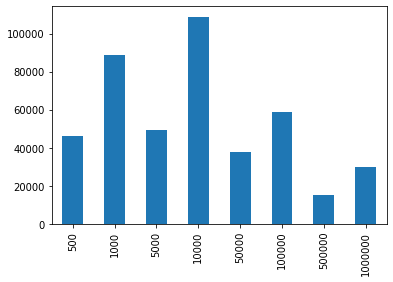

In [64]:
df_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')
df_clean['Installs'].value_counts().sort_index(ascending=True)

In [65]:
df_clean['Last update since 2020'] = [d.split('-')[0] == '2020' for d in df_clean['Last Updated']]
df_clean2['Last update since 2020'] = [t.split('-')[0] == '2020' for t in df_clean2['Last Updated']]

In [66]:
df_clean = df_clean.drop(columns = ['Last Updated'], axis=1)
df_clean2 = df_clean2.drop(columns = ['Last Updated'], axis=1)

In [67]:
df_clean['Last update since 2020'] = (df_clean['Last update since 2020'] == True).astype(int)
df_clean2['Last update since 2020'] = (df_clean2['Last update since 2020'] == True).astype(int)

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435319 entries, 0 to 603046
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Category                435319 non-null  object 
 1   Rating                  435319 non-null  float64
 2   Rating Count            435319 non-null  int64  
 3   Installs                435319 non-null  int64  
 4   Free                    435319 non-null  int64  
 5   Size                    435319 non-null  object 
 6   Content Rating          435319 non-null  object 
 7   Ad Supported            435319 non-null  int64  
 8   In App Purchases        435319 non-null  int64  
 9   Editors Choice          435319 non-null  int64  
 10  Last update since 2020  435319 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 39.9+ MB


In [69]:
df_clean = df_clean.drop(columns = ['Category'], axis=1)
df_clean2 = df_clean2.drop(columns = ['Category'], axis=1)

In [70]:
pd.concat([df_clean['Size'].value_counts(),
          df_clean['Size'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
Varies with device,19898,4.570901
11M,11895,2.732479
12M,10099,2.319908
13M,8759,2.012088
14M,8007,1.839341
...,...,...
202M,1,0.000230
241M,1,0.000230
349M,1,0.000230
896M,1,0.000230


In [71]:
df_clean['Size'] = ((df_clean['Size'] == 'Varies with device') | (df_clean['Size'] == '11M')).astype(int)
df_clean2['Size'] = ((df_clean2['Size'] == 'Varies with device') | (df_clean2['Size'] == '11M')).astype(int)

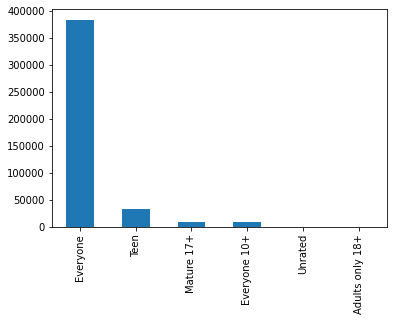

In [72]:
df_clean['Content Rating'].value_counts().plot(kind='bar')

In [73]:
df_clean = df_clean.drop(columns = ['Rating Count'], axis=1)
df_clean2 = df_clean2.drop(columns = ['Rating Count'], axis=1)

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435319 entries, 0 to 603046
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Rating                  435319 non-null  float64
 1   Installs                435319 non-null  int64  
 2   Free                    435319 non-null  int64  
 3   Size                    435319 non-null  int64  
 4   Content Rating          435319 non-null  object 
 5   Ad Supported            435319 non-null  int64  
 6   In App Purchases        435319 non-null  int64  
 7   Editors Choice          435319 non-null  int64  
 8   Last update since 2020  435319 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 33.2+ MB


In [75]:
# object 자료형 데이터의 변수를 정리합니다.
chr_features = ['Content Rating']

# 수치 자료형 데이터의 변수를 정리합니다.
num_features=['Installs', 'Free', 'Size', 'Ad Supported','In App Purchases', 'Editors Choice', 'Last update since 2020']

In [76]:
# 더미를 기법을 사용하여 변환합니다.
for variable in chr_features:
    
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
    dummies = pd.get_dummies(df_clean[chr_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
    df_dummy= pd.concat([df_clean[num_features], dummies],axis=1)

In [77]:
for variable in chr_features:
    
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
    dummies2 = pd.get_dummies(df_clean2[chr_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
    df_dummy2 = pd.concat([df_clean2[num_features], dummies2],axis=1)

In [78]:
df_dummy.columns

Index(['Installs', 'Free', 'Size', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Last update since 2020',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated'],
      dtype='object')

In [79]:
df_dummy2.columns

Index(['Installs', 'Free', 'Size', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Last update since 2020',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated'],
      dtype='object')

In [80]:
x = df_dummy.to_numpy()
print(np.shape(x))

(435319, 13)


In [81]:
y = df_clean['Rating']
print(np.shape(y.to_numpy()))
y = y.to_numpy()

(435319,)


In [82]:
del df_clean['Rating']

In [83]:
target = df_dummy2.to_numpy()
print(np.shape(target))

(46922, 13)


In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [85]:
from sklearn.preprocessing import MinMaxScaler #사이킷런

# 정규화를 위해서 StandardScaler 불러오기
mn = MinMaxScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행
x_train = mn.fit_transform(x_train)
x_test = mn.transform(x_test)

In [86]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor, plot_importance
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV

10-fold cross validation setting

In [42]:
# kfold = KFold(n_splits=5, random_state=1, shuffle=True)

DT

In [ ]:
# r2_dt = DecisionTreeRegressor()
# accuracy = np.mean(cross_val_score(r2_dt, x, y, scoring="accuracy", cv=kfold))
# print(accuracy)

RF

In [ ]:
# r3_rf = RandomForestRegressor()
# accuracy = np.mean(cross_val_score(r3_rf, x, y, scoring="accuracy", cv=kfold))
# print(accuracy)

LGBM

In [ ]:
# r4_lgbm = LGBMRegressor()
# accuracy = np.mean(cross_val_score(r4_lgbm, x, y, scoring="accuracy", cv=kfold))
# print(accuracy)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor


model_1 = DecisionTreeRegressor()
model_2 = RandomForestRegressor(n_jobs=-1)
model_3 = XGBRegressor(n_jobs=-1)
model_4 = LGBMRegressor(n_jobs=-1)

model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)

[14:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [88]:
y_pred_1 = model_1.predict(target)
y_pred_2 = model_2.predict(target)
y_pred_3 = model_3.predict(target)
y_pred_4 = model_4.predict(target)

In [90]:
df_1 = pd.DataFrame(y_pred_1)
df_2 = pd.DataFrame(y_pred_2)
df_3 = pd.DataFrame(y_pred_3)
df_4 = pd.DataFrame(y_pred_4)
df_1.to_csv("/content/drive/MyDrive/실습/nam1.csv")
df_2.to_csv("/content/drive/MyDrive/실습/nam2.csv")
df_3.to_csv("/content/drive/MyDrive/실습/nam3.csv")
df_4.to_csv("/content/drive/MyDrive/실습/nam4.csv")